<h1>Project - Customer Segmentation using Machine Learning</h1>

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 400

df = pd.DataFrame({
    "Age": np.random.randint(18, 65, n),
    "Income": np.random.normal(50000, 15000, n),
    "MonthlySpend": np.random.normal(6000, 2500, n),
    "VisitsPerMonth": np.random.randint(1, 15, n)
})

df.loc[df.sample(frac=0.05).index, "MonthlySpend"] = np.nan

In [2]:
df["MonthlySpend"].fillna(df["MonthlySpend"].mean(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_3304\3668997734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MonthlySpend"].fillna(df["MonthlySpend"].mean(), inplace=True)


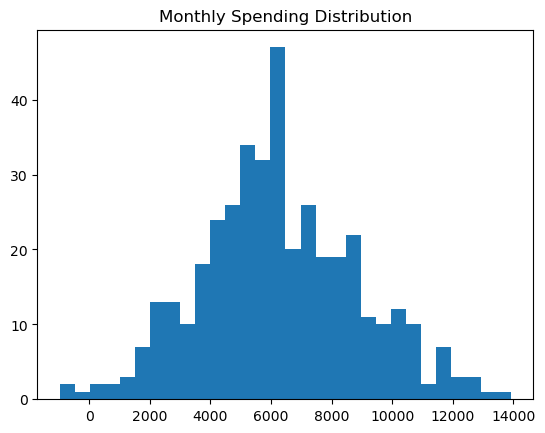

In [3]:
import matplotlib.pyplot as plt

plt.hist(df["MonthlySpend"], bins=30)
plt.title("Monthly Spending Distribution")
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df[["Income", "MonthlySpend", "VisitsPerMonth"]]

scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df["Segment"] = kmeans.fit_predict(scaled)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


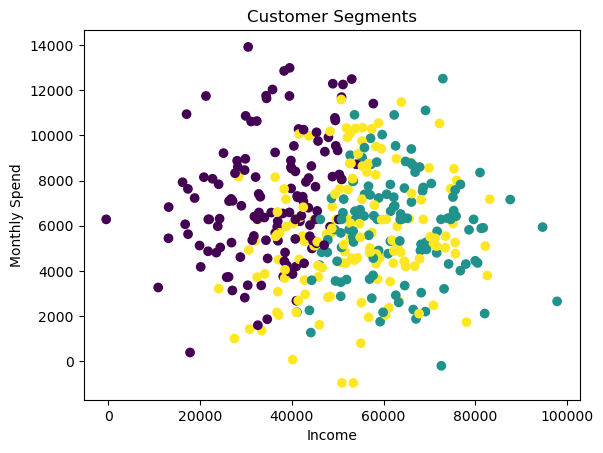

In [5]:
plt.scatter(df["Income"], df["MonthlySpend"], c=df["Segment"])
plt.xlabel("Income")
plt.ylabel("Monthly Spend")
plt.title("Customer Segments")
plt.show()